# Machine Learning for Factor Investing  
### *by Guillaume Coqueret & Tony Guida*

# Ch1 Prepare the returns matrix

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
data_raw = pd.read_csv("data_ml.csv")

In [60]:
idx_date = data_raw.index[(data_raw['date']>'1999-12-31') &
                            (data_raw['date']<'2019-01-01')].tolist()
data_ml = data_raw.iloc[idx_date]

In [72]:
data_ml.iloc[:6,0:6]

,stock_id,date,Advt_12M_Usd,Advt_3M_Usd,Advt_6M_Usd,Asset_Turnover
0,1,2000-01-31,0.41,0.39,0.42,0.19
1,1,2000-02-29,0.41,0.39,0.40,0.19
2,1,2000-03-31,0.40,0.37,0.37,0.20
3,1,2000-04-30,0.39,0.36,0.37,0.20
4,1,2000-05-31,0.40,0.42,0.40,0.20
5,1,2000-06-30,0.41,0.47,0.42,0.21


Text(0, 0.5, 'nb_assets')

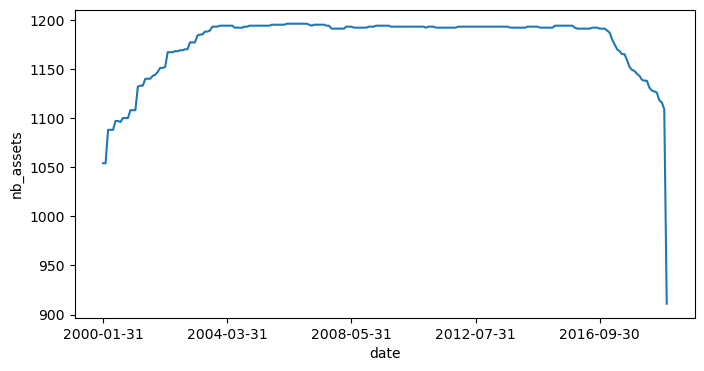

In [49]:
# check the missing data
pd.Series(data_ml.groupby('date').size()).plot(figsize=(8,4))
plt.ylabel('nb_assets') # number of assets

In [84]:
data_ml.columns

Index(['stock_id', 'date', 'Advt_12M_Usd', 'Advt_3M_Usd', 'Advt_6M_Usd',
       'Asset_Turnover', 'Bb_Yld', 'Bv', 'Capex_Ps_Cf', 'Capex_Sales',
       'Cash_Div_Cf', 'Cash_Per_Share', 'Cf_Sales', 'Debtequity', 'Div_Yld',
       'Dps', 'Ebit_Bv', 'Ebit_Noa', 'Ebit_Oa', 'Ebit_Ta', 'Ebitda_Margin',
       'Eps', 'Eps_Basic', 'Eps_Basic_Gr', 'Eps_Contin_Oper', 'Eps_Dil', 'Ev',
       'Ev_Ebitda', 'Fa_Ci', 'Fcf', 'Fcf_Bv', 'Fcf_Ce', 'Fcf_Margin',
       'Fcf_Noa', 'Fcf_Oa', 'Fcf_Ta', 'Fcf_Tbv', 'Fcf_Toa', 'Fcf_Yld',
       'Free_Ps_Cf', 'Int_Rev', 'Interest_Expense', 'Mkt_Cap_12M_Usd',
       'Mkt_Cap_3M_Usd', 'Mkt_Cap_6M_Usd', 'Mom_11M_Usd', 'Mom_5M_Usd',
       'Mom_Sharp_11M_Usd', 'Mom_Sharp_5M_Usd', 'Nd_Ebitda', 'Net_Debt',
       'Net_Debt_Cf', 'Net_Margin', 'Netdebtyield', 'Ni', 'Ni_Avail_Margin',
       'Ni_Oa', 'Ni_Toa', 'Noa', 'Oa', 'Ocf', 'Ocf_Bv', 'Ocf_Ce', 'Ocf_Margin',
       'Ocf_Noa', 'Ocf_Oa', 'Ocf_Ta', 'Ocf_Tbv', 'Ocf_Toa', 'Op_Margin',
       'Op_Prt_Margin', 'Oper_Ps_Net_

In [86]:
features = list(data_ml.iloc[:,3:95].columns)
features_short = ['Div_Yld','Eps', 'Mkt_Cap_12M_Usd','Mom_11M_Usd','Ocf','Pb','Vol1Y_Usd']

Text(0, 0.5, 'frequency')

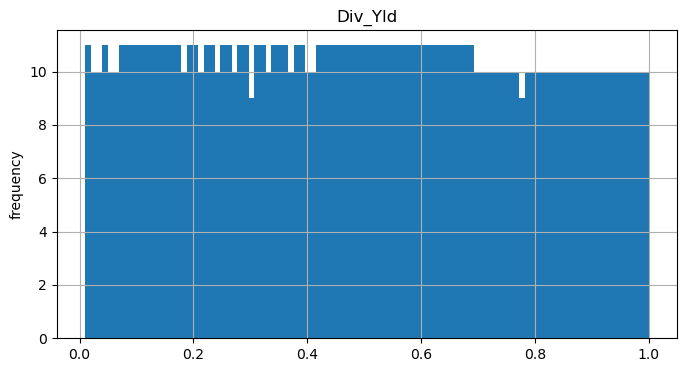

In [112]:
col_feat_Div_Yld =data_ml.columns.get_loc('Div_Yld')
is_custom_date = data_ml['date'] =='2000-02-29'
data_ml[is_custom_date].iloc[:,[col_feat_Div_Yld]].hist(bins=100, figsize=(8,4)) #the dividend yield should be nomralized data
plt.ylabel('frequency')

In [118]:
data_ml[features_short].describe()

,Div_Yld,Eps,Mkt_Cap_12M_Usd,Mom_11M_Usd,Ocf,Pb,Vol1Y_Usd
count,268336.000000,268336.000000,268336.000000,268336.000000,268336.000000,268336.000000,268336.000000
mean,0.502481,0.502865,0.501695,0.500756,0.501578,0.495594,0.500544
std,0.287733,0.287126,0.287624,0.287527,0.287120,0.283741,0.287415
min,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,0.250000,0.260000,0.250000,0.250000,0.250000,0.250000,0.250000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,0.750000,0.750000,0.750000,0.750000,0.750000,0.730000,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [132]:
df_median =[]
df= []
df_median = data_ml[['date','R1M_Usd','R12M_Usd']].groupby(['date']).median()
df_median.rename(columns={'R1M_Usd': 'R1M_Usd_median',
                          'R12M_Usd': 'R12M_Usd_median'}, inplace=True)
df = pd.merge(data_ml , df_median, how ='left', on=['date'])

In [148]:
# Create the categorical labels (Binary)
data_ml['R1M_Usd_C'] = np.where(
    df['R1M_Usd'] > df['R1M_Usd_median'] ,1.0, 0.0)
data_ml['R12M_Usd_C'] = np.where(
    df['R12M_Usd'] > df['R12M_Usd_median'],1.0,0.0)

In [156]:
# train test split, use the latest data for the test set in time series 

sep_date = '2014-01-15' # How to decide the separation date to deal with regime change
idx_train = data_ml.index[(data_ml['date'] <sep_date)].tolist()
idx_text = data_ml.index[(data_ml['date'] >= sep_date)].tolist()

In [190]:
stock_ids_short =[]
stock_days = []
stock_ids = data_ml['stock_id'].unique()

stock_days = data_ml[['date','stock_id']].groupby(
    ['stock_id']).count().reset_index() # compute the data point for each stock

stock_ids_short = stock_days.loc[ 
    stock_days['date'] == (stock_days['date'].max())] #only pick the stock without missing data

stock_ids_short = stock_ids_short['stock_id'].unique()
is_stock_ids_short = data_ml['stock_id'].isin(stock_ids_short)

#prepare returns matrix
returns = data_ml[is_stock_ids_short].pivot(index='date', columns='stock_id', values='R1M_Usd')


In [194]:
# Returns for 793 securities over 228 trading days
returns

stock_id,1,3,4,7,9,11,12,16,17,18,...,1199,1200,1201,1202,1203,1204,1208,1209,1210,1212
date,,,,,,,,,,,,,,,,,,,,,
2000-01-31,-0.036,0.077,-0.016,-0.009,0.032,0.144,-0.110,-0.191,-0.103,0.098,...,-0.509,0.039,-0.011,-0.019,0.168,0.080,-0.372,-0.560,-0.006,-0.186
2000-02-29,0.263,-0.024,0.000,0.027,0.076,0.258,0.110,0.197,-0.053,-0.001,...,-0.147,0.017,-0.148,0.118,0.177,0.161,0.143,-0.102,-0.057,0.104
2000-03-31,0.031,0.018,0.153,0.000,-0.025,0.049,0.134,-0.030,0.074,-0.002,...,0.083,0.006,-0.025,-0.009,0.237,-0.008,0.057,0.144,0.085,-0.143
2000-04-30,0.448,0.027,-0.011,-0.017,-0.022,0.014,0.022,0.161,0.051,-0.037,...,-0.192,0.003,-0.061,0.053,-0.097,-0.114,0.070,-0.103,0.073,0.204
2000-05-31,-0.097,0.050,0.014,0.018,-0.121,-0.116,-0.038,-0.020,0.038,-0.131,...,-0.279,0.014,0.118,0.089,-0.023,-0.089,-0.137,0.113,0.016,0.042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31,-0.002,-0.049,0.036,-0.068,-0.028,0.146,0.040,0.016,0.297,0.025,...,-0.006,-0.005,-0.048,-0.010,0.037,0.005,0.126,-0.009,-0.011,0.044
2018-09-30,-0.155,-0.070,-0.025,-0.052,-0.098,-0.291,-0.044,-0.050,-0.150,-0.135,...,-0.064,-0.013,-0.070,-0.024,-0.030,-0.161,-0.119,0.000,0.028,-0.266
2018-10-31,0.014,0.036,0.000,0.007,-0.018,-0.100,0.074,0.094,-0.081,0.074,...,-0.075,0.068,0.051,0.078,-0.005,0.107,0.205,0.076,0.063,0.013
